<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Singl_label_classification_using_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Классификатор кошек по изображениям кошек и собак.

**Установка библиотек**

In [68]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

**Импорт библиотек**

In [69]:
from fastai.vision.all import *


**Загрузка данных**

Используется Oxford-IIIT Pet Dataset который состоит из изображений котов и собак различных пород.

In [70]:
path = untar_data(URLs.PETS)

In [71]:
path.ls()# состав папки

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

Скачивание файлов изображений

In [72]:
files = get_image_files(path/"images")
len(files)

7390

Названия файлов в этом датасете имеют особенность: для кошек они начинаются с заглавных букв, а для собак - с прописных.

In [73]:
files[0], files[2]

(Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_278.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_24.jpg'))

Разметку изображений можно сделать с помощью простой функции:

In [74]:
def label_func(f): return f[0].isupper()

In [75]:
label_func('British_Shorthair_278.jpg')

True

**Создание датасета для обучения**

Используется DataLoader, который считывает разметку данных с названий файлов: ImageDataLoaders.from_name_func.

In [76]:
dls = ImageDataLoaders.from_name_func(path, files[0:100], label_func, item_tfms=Resize(224))

Просмотр примера изображений и их меток (кошка - True, собака - False).

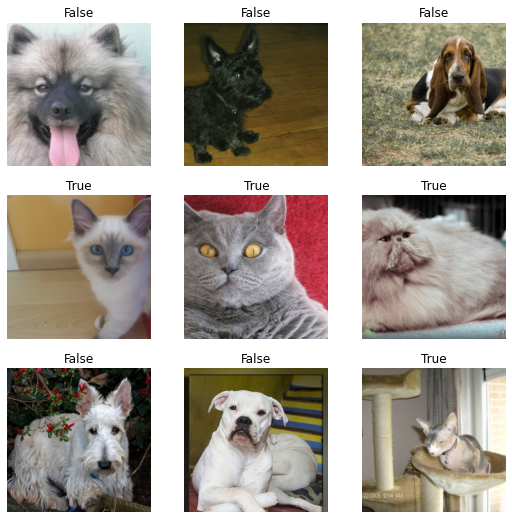

In [77]:
dls.show_batch()

**Обучение**

Для обучения будет использована предобученная сеть ResNet34.

In [78]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.601051,3.814509,0.350000,00:30


epoch,train_loss,valid_loss,error_rate,time
0,1.319510,2.580909,0.350000,00:42


**Результаты**

Предсказание для любого конкретного изображения.

In [79]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([0.9900, 0.0100]))

Визуализация предсказаний.

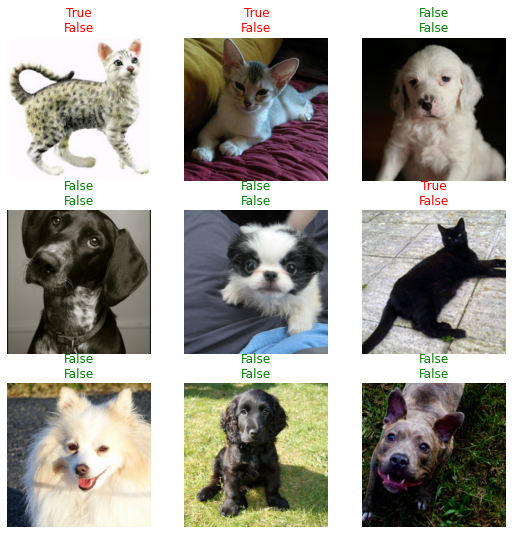

In [80]:
learn.show_results()

**Links:**

https://docs.fast.ai/tutorial.vision.html